In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

class PID_INC():
    def __init__(self, kp, ki, kd, min, max, dt) -> None:
        self.kp = kp 
        self.ki = ki
        self.kd = kd
        self.min = min
        self.max = max
        self.dt = dt 

        self.ei = 0
        self.ed = 0
        self.pre_err = 0

    def cal(self, target, measure):
        error = target - measure
        u = self.kp*error + self.ki*self.ei + self.kd*self.ed
        self.ei += error*self.dt
        self.ed = (error - self.pre_err)/self.dt
        self.pre_err = error
        return u

<function matplotlib.pyplot.show(close=None, block=None)>

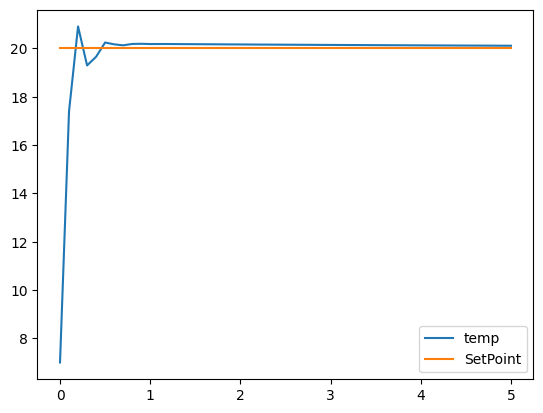

In [21]:
target = 20 # 设定值
min = -100  #下限
max = 100   #上限
dt = 0.1      #PID采样时间
T = 5     #模拟时长
y_0 = 7    #初始温度

kp, ki, kd = [0.8, 0.1, 0.01] #PID参数

pid = PID_INC(kp, ki, kd, min, max, dt)
res = [7]
time_current = [0]

for i in range(int(T/dt)):
    delta_u = pid.cal(target, y_0)
    y_0 += delta_u
    res.append(y_0)
    time_current.append(dt*(i+1))
plt.plot(time_current, res, label='temp')
plt.plot(time_current, [target for x in range(int(T/dt)+1)], label='SetPoint')
plt.legend()
plt.show